In [23]:
import numpy as np
import matplotlib.pyplot as plt

## Defining variables from the given information

In [24]:
samples = 10000
params = 1                         
Data_p = 7
sigma_Dx = 0.05
sigma_Dy = 0.05

a = 0.240                ## Took the values of nuisance parameter from the research paper
b = 0.062   
d = 0.062   
e = 0.168   

## Opening the files and storing the data

In [25]:
Data = open('eddington_data.txt', 'r')
x, y, E_x, E_y, D_x, D_y = np.loadtxt(Data, unpack=True, skiprows=2, usecols=[0,1,2,3,4,5])

K = -1.500
J = -1.324

DX = [m - K for m in D_x]
DY = [n - J for n in D_y]

print('Values of x = ', x)
print('Values of y = ', y)
print('Values of E_x = ', E_x)
print('Valus of E_y = ', E_y)
print('Given values of D_x = ', D_x)
print('Given values of D_y = ', D_y)
print('Values of D_x after subtraction = ', DX)
print('Values of D_y after subtraction = ', DY)

Values of x =  [-1.261 -0.16   0.334  0.348  0.587  0.86   1.079]
Values of y =  [-0.16  -1.107  0.472  0.36   1.099  1.321 -0.328]
Values of E_x =  [-0.587 -0.557 -0.186 -0.222  0.08   0.158  1.54 ]
Valus of E_y =  [ 0.036 -0.789  1.336  1.574  0.726  0.589 -0.156]
Given values of D_x =  [-1.416 -1.221 -1.054 -1.079 -1.012 -0.999 -0.733]
Given values of D_y =  [-1.324 -1.312 -0.944 -0.862 -0.932 -0.948 -1.019]
Values of D_x after subtraction =  [0.08400000000000007, 0.2789999999999999, 0.44599999999999995, 0.42100000000000004, 0.488, 0.501, 0.767]
Values of D_y after subtraction =  [0.0, 0.01200000000000001, 0.3800000000000001, 0.4620000000000001, 0.392, 0.3760000000000001, 0.30500000000000016]


## Calculation of Likelihood

In [26]:
def Data_X(x, y, E_x, alpha, a, b):
    DM_x = a*x + b* y + ((alpha)*(E_x))
    return DM_x

def Data_Y(x, y, E_y, alpha, d, e):
    DM_y = d*x + e*y + ((alpha)*(E_y))
    return DM_y


Differ_x = np.empty(Data_p)
Differ_y = np.empty(Data_p)
L_1 = np.empty(Data_p)
L_2 = np.empty(Data_p)
L = np.empty(Data_p)

def Likelihood(x, y, E_x, E_y, D_x, D_y, alpha):               ## Natural log likelihood
    if alpha <= 0.0:
        LH = -1.e100
    else:
        for i in range(Data_p):
            Differ_x[i] = DX[i] - Data_X(x[i], y[i], E_x[i], alpha, a, b)
            Differ_y[i] = DY[i] - Data_Y(x[i], y[i], E_y[i], alpha, d, e)
            L_1[i] = - np.log(np.sqrt(2*np.pi)*(sigma_Dx)) - (((Differ_x[i])**2)/(2*(sigma_Dx)**2))
            L_2[i] = - np.log(np.sqrt(2*np.pi)*(sigma_Dy)) - (((Differ_y[i])**2)/(2*(sigma_Dy)**2))
    
            L[i] = L_1[i] + L_2[i]
        
        LH = np.prod(L)
        return LH

## Sampling

In [27]:
est_par_1 = np.empty([samples, params+1])           ## Defining for empty arrays for four random walkers
est_par_2 = np.empty([samples, params+1])
est_par_3 = np.empty([samples, params+1])
est_par_4 = np.empty([samples, params+1])

alpha_sigma = 0.001

LH_pre_1 = 0
LH_pre_2 = 0
LH_pre_3 = 0
LH_pre_4 = 0

LH_next_1 = 0
LH_next_2 = 0
LH_next_3 = 0
LH_next_4 = 0

Accept_1 = 0
Accept_2 = 0
Accept_3 = 0
Accept_4 = 0

alpha_next_1 = 0
alpha_next_2 = 0
alpha_next_3 = 0
alpha_next_4 = 0

np.random.seed(0)

est_par_1[0,0] = np.random.uniform()
est_par_2[0,0] = np.random.uniform()
est_par_3[0,0] = np.random.uniform()
est_par_4[0,0] = np.random.uniform()

est_par_1[0,1] = Likelihood(x, y, E_x, E_y, D_x, D_y, est_par_1[0,0])
est_par_2[0,1] = Likelihood(x, y, E_x, E_y, D_x, D_y, est_par_2[0,0])
est_par_3[0,1] = Likelihood(x, y, E_x, E_y, D_x, D_y, est_par_3[0,0])
est_par_4[0,1] = Likelihood(x, y, E_x, E_y, D_x, D_y, est_par_4[0,0])

In [28]:
np.random.seed(0)

## 1st Random Walker :

for i in range(1,samples):
    LH_pre_1 = est_par_1[i-1,1]
    alpha_next_1 = np.random.normal(est_par_1[i-1,0], alpha_sigma)
    LH_next_1 = Likelihood(x, y, E_x, E_y, D_x, D_y, alpha_next_1)
    
    if LH_next_1 >= LH_pre_1:
        est_par_1[i,0] = alpha_next_1
        est_par_1[i,1] = LH_next_1
        Accept_1 = Accept_1 + 1
        print("Step is accepted with a high likelihood")
        
    else:
        A1 = np.random.uniform()
        if (LH_next_1 - LH_pre_1) > np.log(A1):
            est_par_1[i,0] = alpha_next_1
            est_par_1[i,1] = LH_next_1
            Accept_1 = Accept_1 + 1
            print("Step is accepted with a low likelihood")
            
        else:
            est_par_1[i,0] = est_par_1[i-1,0]
            est_par_1[i,1] = LH_pre_1
            print("The step is rejected")
            

The step is rejected
The step is rejected
The step is rejected
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
Step is accepted wit

In [29]:
np.random.seed(0)
## 2nd Random Walker

for j in range(1,samples):
    LH_pre_2 = est_par_2[j-1,1]
    alpha_next_2 = np.random.normal(est_par_2[j-1,0], alpha_sigma)
    LH_next_2 = Likelihood(x, y, E_x, E_y, D_x, D_y, alpha_next_2)
    
    if LH_next_2 >= LH_pre_2:
        est_par_2[j,0] = alpha_next_2
        est_par_2[j,1] = LH_next_2
        Accept_2 = Accept_2 + 1
        print("Step is accepted with a high likelihood")
        
    else:
        A2 = np.random.uniform()
        if (LH_next_2 - LH_pre_2) > np.log(A2):
            est_par_2[j,0] = alpha_next_2
            est_par_2[j,1] = LH_next_2
            Accept_2 = Accept_2 + 1
            print("Step is accepted with a low likelihood")
            
        else:
            est_par_2[j,0] = est_par_2[j-1,0]
            est_par_2[j,1] = LH_pre_2
            print("The step is rejected")

The step is rejected
The step is rejected
The step is rejected
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
Step is accepted wit

In [30]:
for k in range(1,samples):
    LH_pre_3 = est_par_3[k-1,1]
    alpha_next_3 = np.random.normal(est_par_3[k-1,0], alpha_sigma)
    LH_next_3 = Likelihood(x, y, E_x, E_y, D_x, D_y, alpha_next_3)
    
    if LH_next_3 >= LH_pre_3:
        est_par_3[k,0] = alpha_next_3
        est_par_3[k,1] = LH_next_3
        Accept_3 = Accept_3 + 1
        print("Step is accepted with a high likelihood")
        
    else:
        A3 = np.random.uniform()
        if (LH_next_3 - LH_pre_3) > np.log(A3):
            est_par_3[k,0] = alpha_next_3
            est_par_3[k,1] = LH_next_3
            Accept_3 = Accept_3 + 1
            print("Step is accepted with a low likelihood")
            
        else:
            est_par_3[k,0] = est_par_3[k-1,0]
            est_par_3[k,1] = LH_pre_3
            print("The step is rejected")

Step is accepted with a high likelihood
The step is rejected
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
The step is rejected
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
Step is

In [31]:
for l in range(1,samples):
    LH_pre_4 = est_par_4[l-1,1]
    alpha_next_4 = np.random.normal(est_par_4[l-1,0], alpha_sigma)
    LH_next_4 = Likelihood(x, y, E_x, E_y, D_x, D_y, alpha_next_4)
    
    if LH_next_4 >= LH_pre_4:
        est_par_4[l,0] = alpha_next_4
        est_par_4[l,1] = LH_next_4
        Accept_4 = Accept_4 + 1
        print("Step is accepted with a high likelihood")
        
    else:
        A4 = np.random.uniform()
        if (LH_next_4 - LH_pre_4) > np.log(A4):
            est_par_4[l,0] = alpha_next_4
            est_par_4[l,1] = LH_next_4
            Accept_4 = Accept_4 + 1
            print("Step is accepted with a low likelihood")
            
        else:
            est_par_4[l,0] = est_par_4[l-1,0]
            est_par_4[l,1] = LH_pre_4
            print("The step is rejected")

Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
The step is rejected
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
The step is rejected
Step is accepted with a high likelihood
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with a high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with a high likelihood
Step is accepted with 

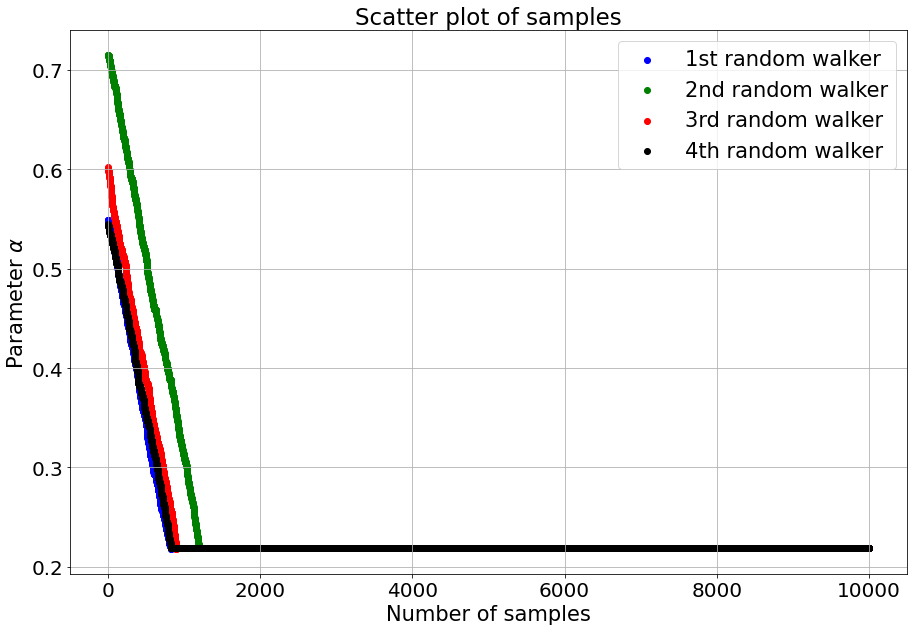

In [32]:
Sample = np.arange(1,10001,1)

plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.scatter(Sample, est_par_1[:,0], c='blue', marker='o', label='1st random walker') 
plt.scatter(Sample, est_par_2[:,0], c='green', marker='o', label='2nd random walker') 
plt.scatter(Sample, est_par_3[:,0], c='red', marker='o', label='3rd random walker') 
plt.scatter(Sample, est_par_4[:,0], c='black', marker='o', label='4th random walker') 
plt.title('Scatter plot of samples', fontsize='23')
plt.xlabel('Number of samples', fontsize='21')
plt.ylabel('Parameter $\u03B1$', fontsize='21')
plt.legend(fontsize='21')
plt.grid(True)
plt.show()

In [33]:
## Burn in

reject = 200

mean_alpha_1 = np.mean(est_par_1[reject:,0])
var_alpha_1 = np.var(est_par_1[reject:,0])
print('Estimated mean value of parameter \u03B1 for 1st walker is =', mean_alpha_1)
print('Estimates variance of parameter \u03B1 is =', var_alpha_1)

mean_alpha_2 = np.mean(est_par_2[reject:,0])
var_alpha_2 = np.var(est_par_2[reject:,0])
print('Estimated mean value of parameter \u03B1 for 2nd walker is =', mean_alpha_2)
print('Estimates variance of parameter \u03B1 is =', var_alpha_2)

mean_alpha_3 = np.mean(est_par_3[reject:,0])
var_alpha_3 = np.var(est_par_3[reject:,0])
print('Estimated mean value of parameter \u03B1 for 3rd walker is =', mean_alpha_3)
print('Estimates variance of parameter \u03B1 is =', var_alpha_3)

mean_alpha_4 = np.mean(est_par_4[reject:,0])
var_alpha_4 = np.var(est_par_4[reject:,0])
print('Estimated mean value of parameter \u03B1 for 4th walker is =', mean_alpha_4)
print('Estimates variance of parameter \u03B1 is =', var_alpha_4)

Means = [mean_alpha_1, mean_alpha_2, mean_alpha_3, mean_alpha_4]
est_mean_alpha = np.mean(Means)
est_std_alpha = np.std(Means)
print('From all the 4 random walkers, the estimated mean of parameter is =', est_mean_alpha)
print('Estimated standard deviation in alpha =', est_std_alpha)

Estimated mean value of parameter α for 1st walker is = 0.2262082409675114
Estimates variance of parameter α is = 0.001214107823848294
Estimated mean value of parameter α for 2nd walker is = 0.24010779355792483
Estimates variance of parameter α is = 0.00549272384493438
Estimated mean value of parameter α for 3rd walker is = 0.2291485694118943
Estimates variance of parameter α is = 0.001941625036100178
Estimated mean value of parameter α for 4th walker is = 0.22688009103323617
Estimates variance of parameter α is = 0.001346513036030583
From all the 4 random walkers, the estimated mean of parameter is = 0.23058617374264168
Estimated standard deviation in alpha = 0.005604223731951882


In [34]:
Acceptance_prob1 = (Accept_1/9800)*100
print(Acceptance_prob1)

Acceptance_prob2 = (Accept_2/9800)*100
print(Acceptance_prob2)

Acceptance_prob3 = (Accept_3/9800)*100
print(Acceptance_prob3)

Acceptance_prob4 = (Accept_4/9800)*100
print(Acceptance_prob4)

As = [Acceptance_prob1, Acceptance_prob2, Acceptance_prob3, Acceptance_prob4]
As_mean = np.mean(As)
print('Average acceptance probability is =', As_mean)

4.612244897959183
6.612244897959184
5.0102040816326525
4.581632653061225
Average acceptance probability is = 5.20408163265306


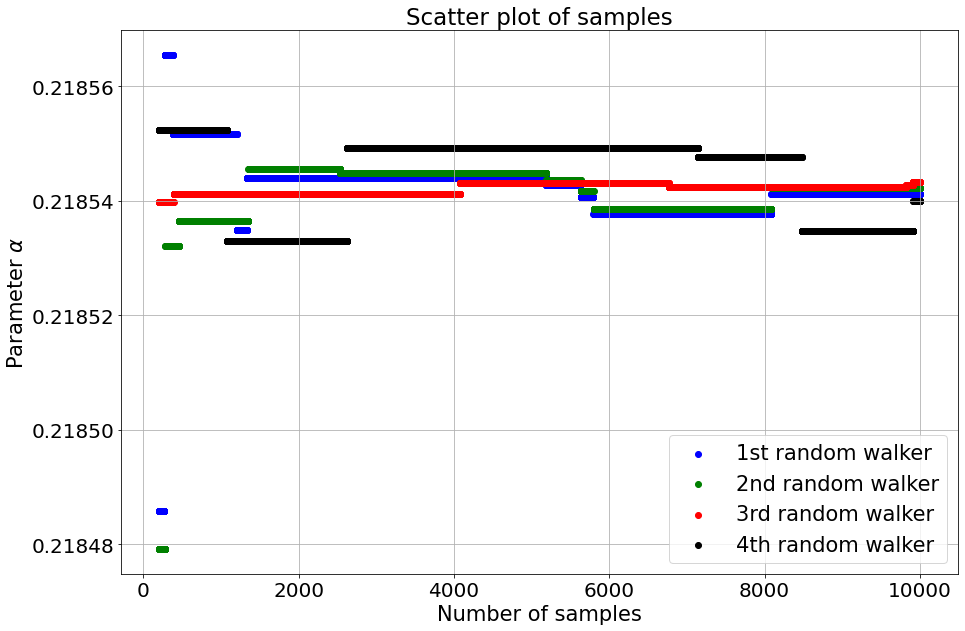

In [17]:
Sample_reject = np.arange(201,10001,1)

plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.scatter(Sample_reject, est_par_1[reject:,0], c='blue', marker='o', label='1st random walker') 
plt.scatter(Sample_reject, est_par_2[reject:,0], c='green', marker='o', label='2nd random walker') 
plt.scatter(Sample_reject, est_par_3[reject:,0], c='red', marker='o', label='3rd random walker') 
plt.scatter(Sample_reject, est_par_4[reject:,0], c='black', marker='o', label='4th random walker') 
plt.title('Scatter plot of samples', fontsize='23')
plt.xlabel('Number of samples', fontsize='21')
plt.ylabel('Parameter $\u03B1$', fontsize='21')
plt.legend(fontsize='21')
plt.grid(True)
plt.show()

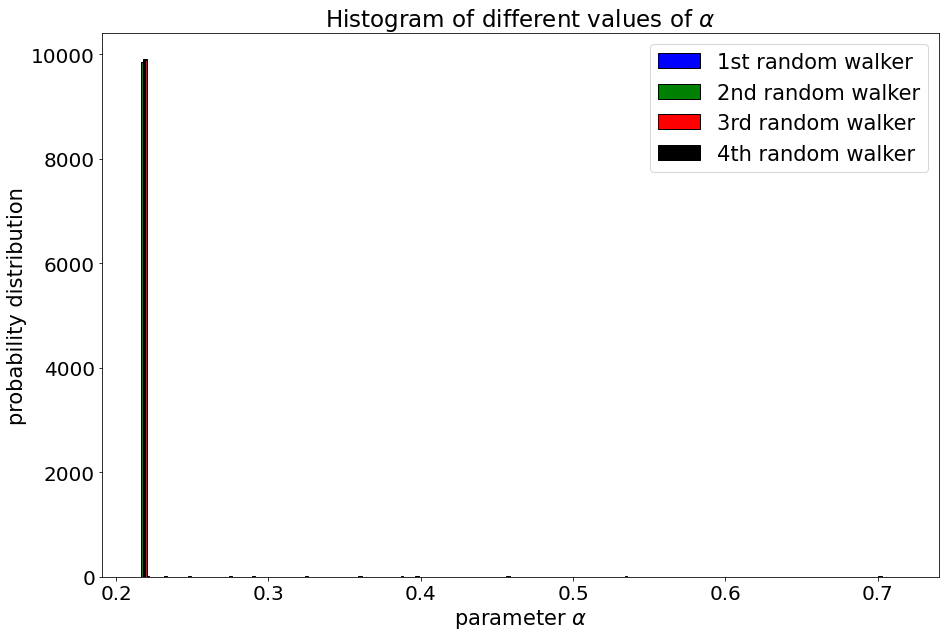

In [18]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.hist(est_par_1[:,0], edgecolor='black', bins=200, color='blue', label='1st random walker')
plt.hist(est_par_2[:,0], edgecolor='black', bins=200, color='green', label='2nd random walker')
plt.hist(est_par_3[:,0], edgecolor='black', bins=200, color='red', label='3rd random walker')
plt.hist(est_par_4[:,0], edgecolor='black', bins=200, color='black', label='4th random walker')
plt.title('Histogram of different values of $\u03B1$', fontsize='23')
plt.xlabel('parameter $\u03B1$', fontsize='21')
plt.ylabel('probability distribution', fontsize='21')
plt.legend(fontsize='21')
plt.show()

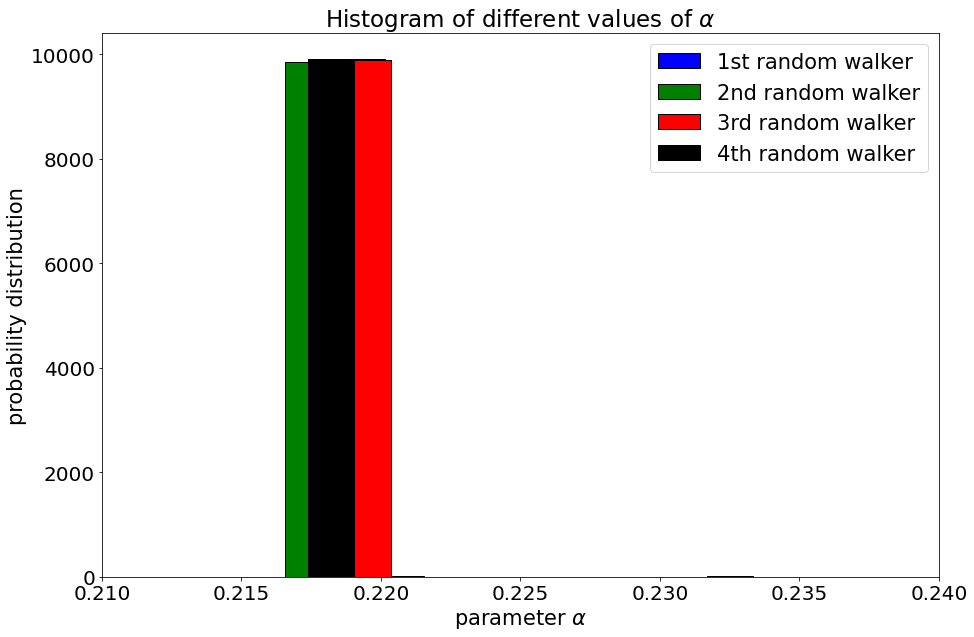

In [19]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.hist(est_par_1[:,0], edgecolor='black', bins=200, color='blue', label='1st random walker')
plt.hist(est_par_2[:,0], edgecolor='black', bins=200, color='green', label='2nd random walker')
plt.hist(est_par_3[:,0], edgecolor='black', bins=200, color='red', label='3rd random walker')
plt.hist(est_par_4[:,0], edgecolor='black', bins=200, color='black', label='4th random walker')
plt.xlim(0.21, 0.24)
plt.title('Histogram of different values of $\u03B1$', fontsize='23')
plt.xlabel('parameter $\u03B1$', fontsize='21')
plt.ylabel('probability distribution', fontsize='21')
plt.legend(fontsize='21')
plt.show()

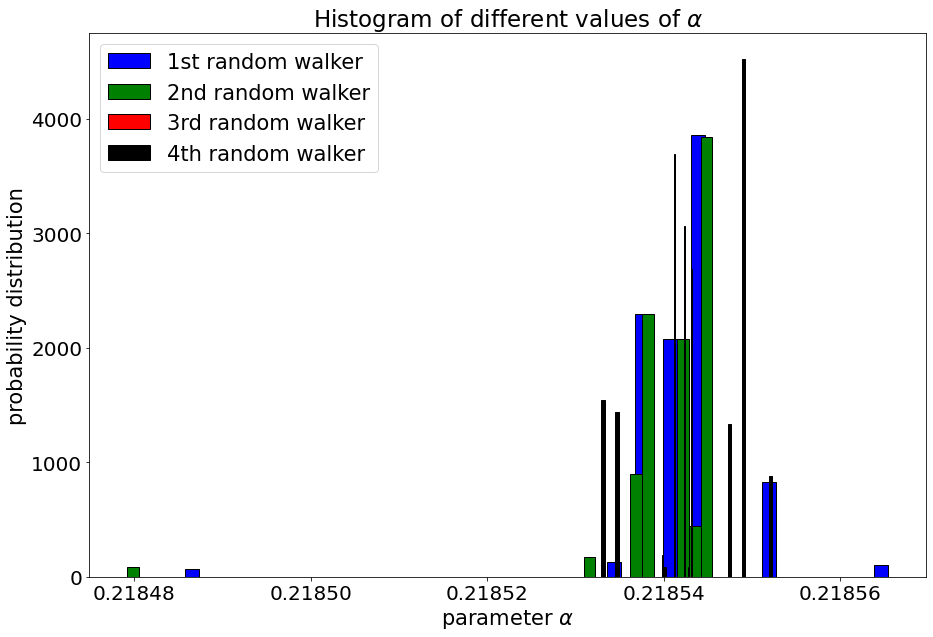

In [20]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.hist(est_par_1[reject:,0], edgecolor='black', bins=50, color='blue', label='1st random walker')
plt.hist(est_par_2[reject:,0], edgecolor='black', bins=50, color='green', label='2nd random walker')
plt.hist(est_par_3[reject:,0], edgecolor='black', bins=50, color='red', label='3rd random walker')
plt.hist(est_par_4[reject:,0], edgecolor='black', bins=50, color='black', label='4th random walker')
plt.title('Histogram of different values of $\u03B1$', fontsize='23')
plt.xlabel('parameter $\u03B1$', fontsize='21')
plt.ylabel('probability distribution', fontsize='21')
plt.legend(fontsize='21')
plt.show()

In [22]:
Value_of_alpha = (19.8)*(est_mean_alpha)
print('The value of \u03B1 is =', Value_of_alpha )

The value of α is = 4.327141664848896
